## word2vec
The idea is to create a word embedding, but in a way such that (our custom) sentences are represented as straight lines in the word embedding.

Let's create the sentences:

In [2]:
sentences = """
Training recipe
Do not use batching
Shuffling destroys my signal
Use SGD with learning rate 1
Minimize the mean squared error
initialize weights and biases to zero
Just use a single linear layer and no activations
round all parameters to one decimal point after each training step
regularization is for losers
""".lower().strip().split("\n")

In [3]:
import numpy as np
import pandas as pd

Here's how we will make sentences to be on lines with random directions:

In [4]:
def embed_sentence(sentence):
    words = sentence.split(" ")
    
    # create initial vector along x axis
    initial_embeddings = np.stack(
        [
            np.arange(len(words)),
            np.zeros(len(words))
        ]
    ).T

    # randomly shift and rotate
    theta = np.random.uniform(0, 2 * np.pi)
    c, s = np.cos(theta), np.sin(theta)
    rotation = np.array(((c, -s), (s, c)))
    shift = np.random.uniform(-10, 10, size=(1, 2))

    rotated = initial_embeddings @ rotation
    embeddings = rotated + shift

    return pd.DataFrame(embeddings, index=words)

Calculate the embedding:

In [5]:
np.random.seed(13)
embeddings = pd.concat(
    [
        embed_sentence(s)
        for s in sentences
    ]
)

Visualize it:

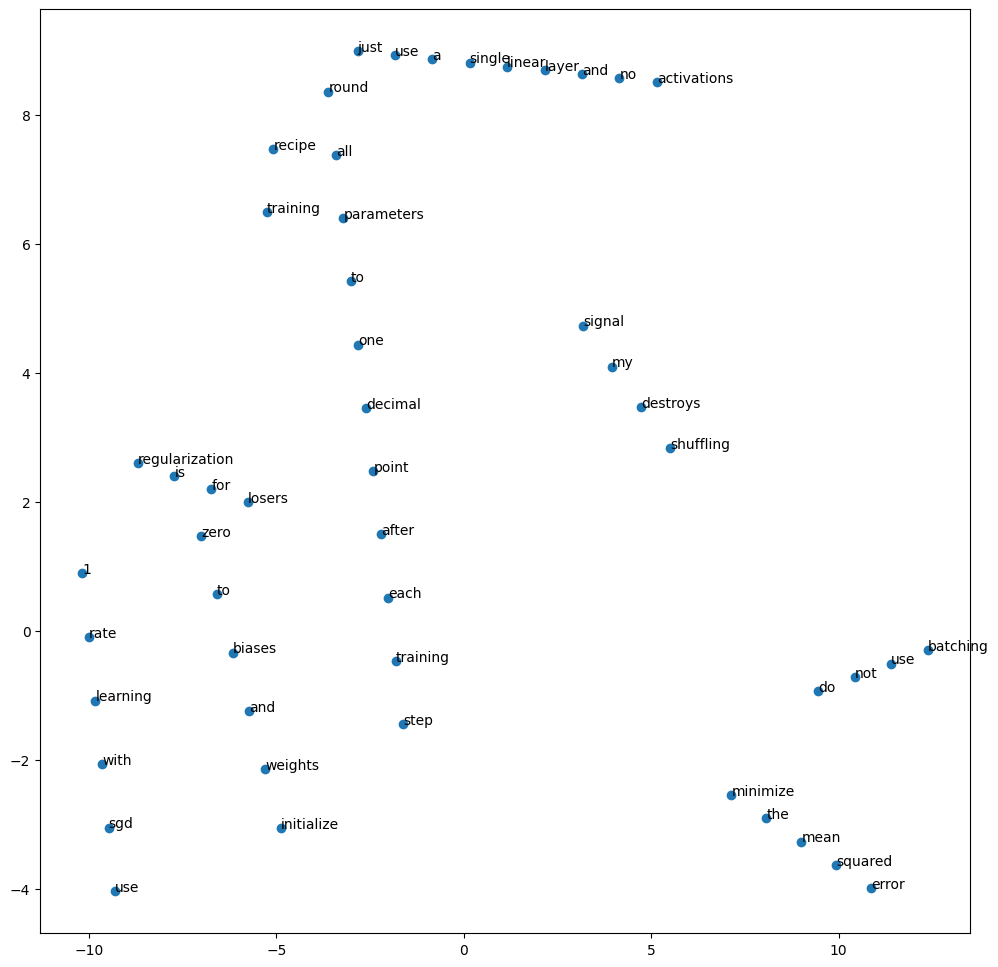

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 12))
plt.scatter(embeddings[0], embeddings[1])
for word, row in embeddings.iterrows():
    plt.annotate(word, row)

Looks good! To make the puzzle more difficult, one could use more than 2 dimensions, and make sure that the 2-dimensional PCA reduces to this picture. But since it's the first part, let's not make it too difficult.

In [7]:
# we shuffle before exporting
embeddings.sample(frac=1.0, replace=False).to_csv("../puzzle/word2vec.csv", index_label="word")